## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

#### Load the diabetes data

In [20]:
diabetes_data = pd.read_csv('data/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**<font color='teal'> Start by reviewing the data info.</font>**

In [21]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**<font color='teal'> Apply the describe function to the data.</font>**

In [22]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [23]:
# Columns where 0s should be replaced with NaN
cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace 0 with NaN in the specified columns
diabetes_data[cols_to_replace] = diabetes_data[cols_to_replace].replace(0, np.nan)

# Display the first few rows to confirm the changes
print(diabetes_data.head())

# Display info to see the Non-Null Count after replacement
print("\nDataFrame Info after replacing zeros with NaN:")
diabetes_data.info()

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      NaN  33.6   
1            1     85.0           66.0           29.0      NaN  26.6   
2            8    183.0           64.0            NaN      NaN  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

DataFrame Info after replacing zeros with NaN:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-nu

**<font color='teal'> Plot histograms of each column. </font>**

Histograms of all columns saved as 'histograms_of_all_columns.png'


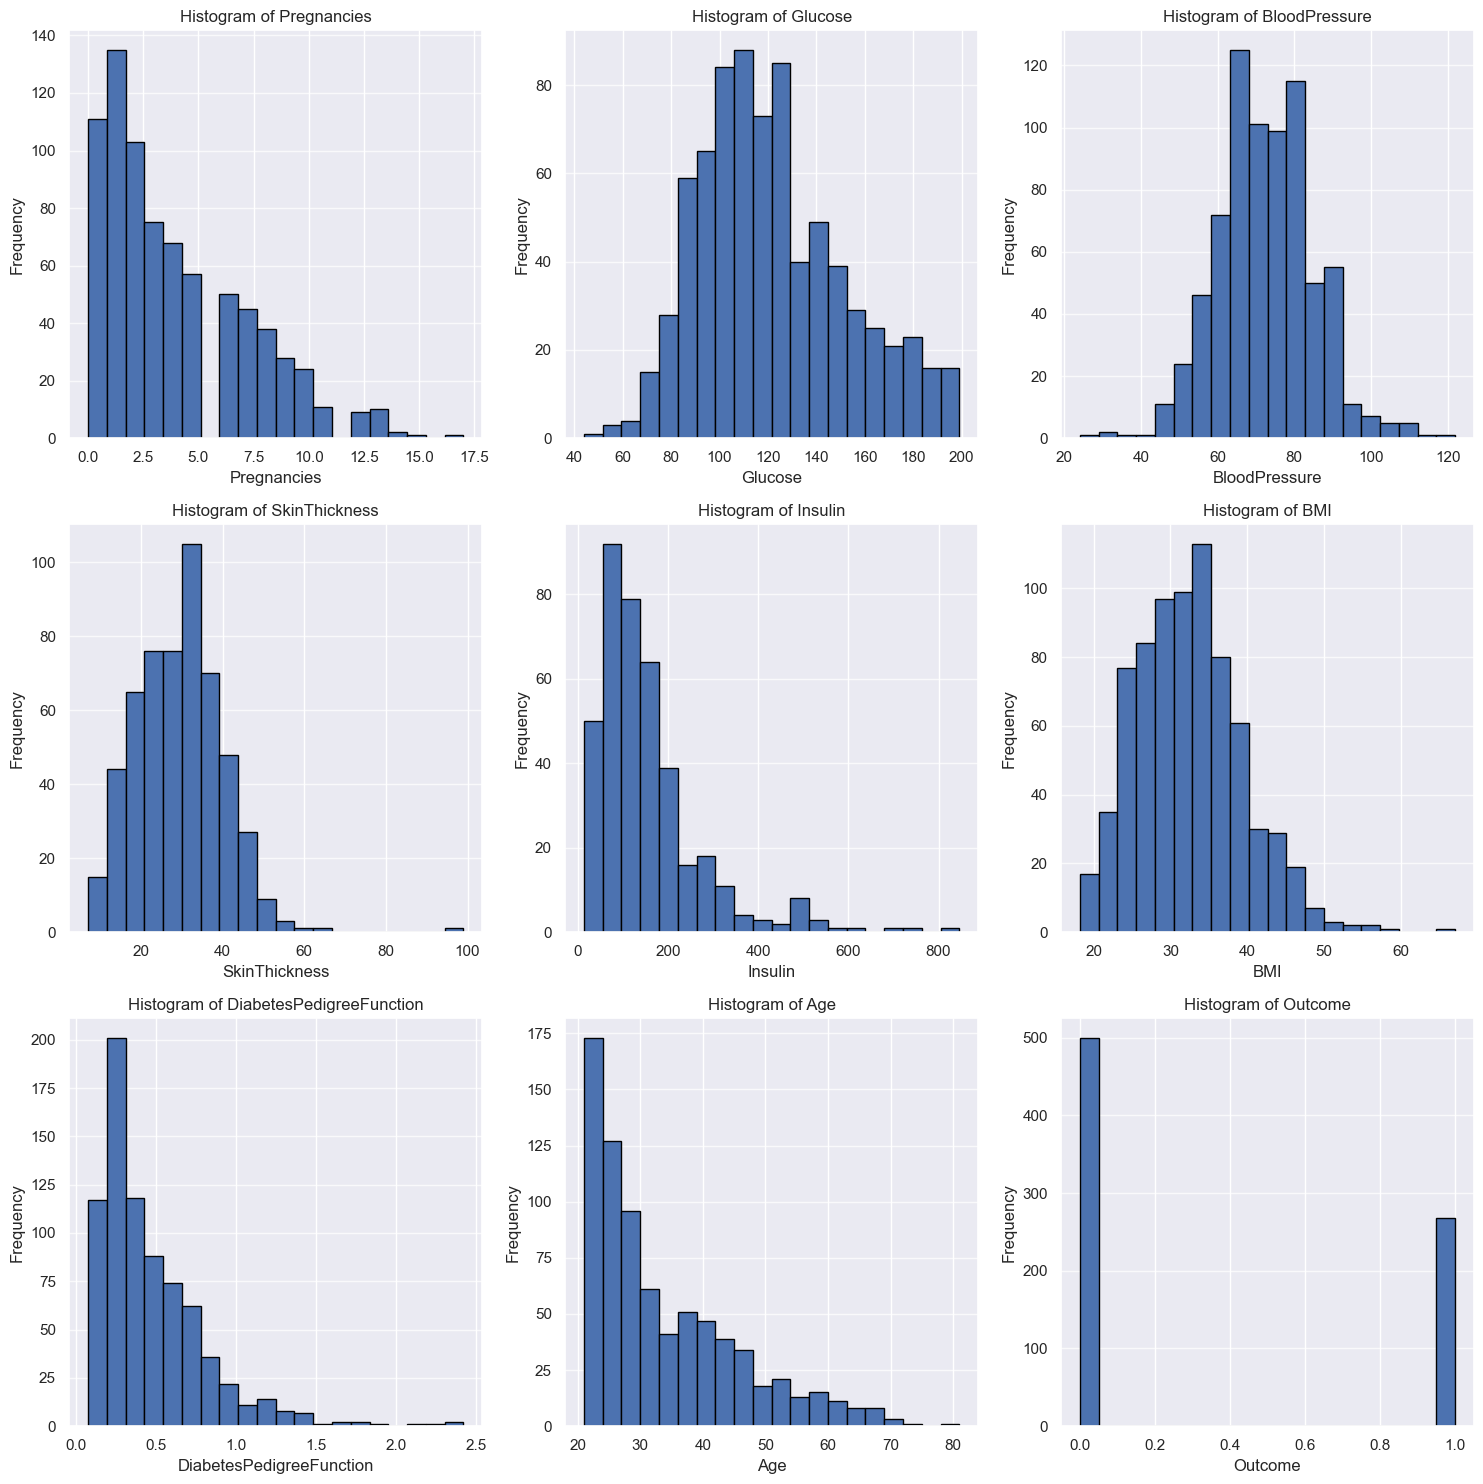

In [24]:
# Plot histograms for each column
num_columns = diabetes_data.shape[1]
num_rows = (num_columns + 2) // 3 # Calculate rows needed for 3 columns per row
plt.figure(figsize=(15, 5 * num_rows)) # Adjust figure size dynamically

for i, column in enumerate(diabetes_data.columns):
    plt.subplot(num_rows, 3, i + 1)
    diabetes_data[column].hist(bins=20, edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.savefig('histograms_of_all_columns.png')
print("Histograms of all columns saved as 'histograms_of_all_columns.png'")

#### Replace the zeros with mean and median values.

In [25]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_2816\2273347448.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_2816\2273347448.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

Histograms of all columns saved as 'histograms_of_all_columns.png'


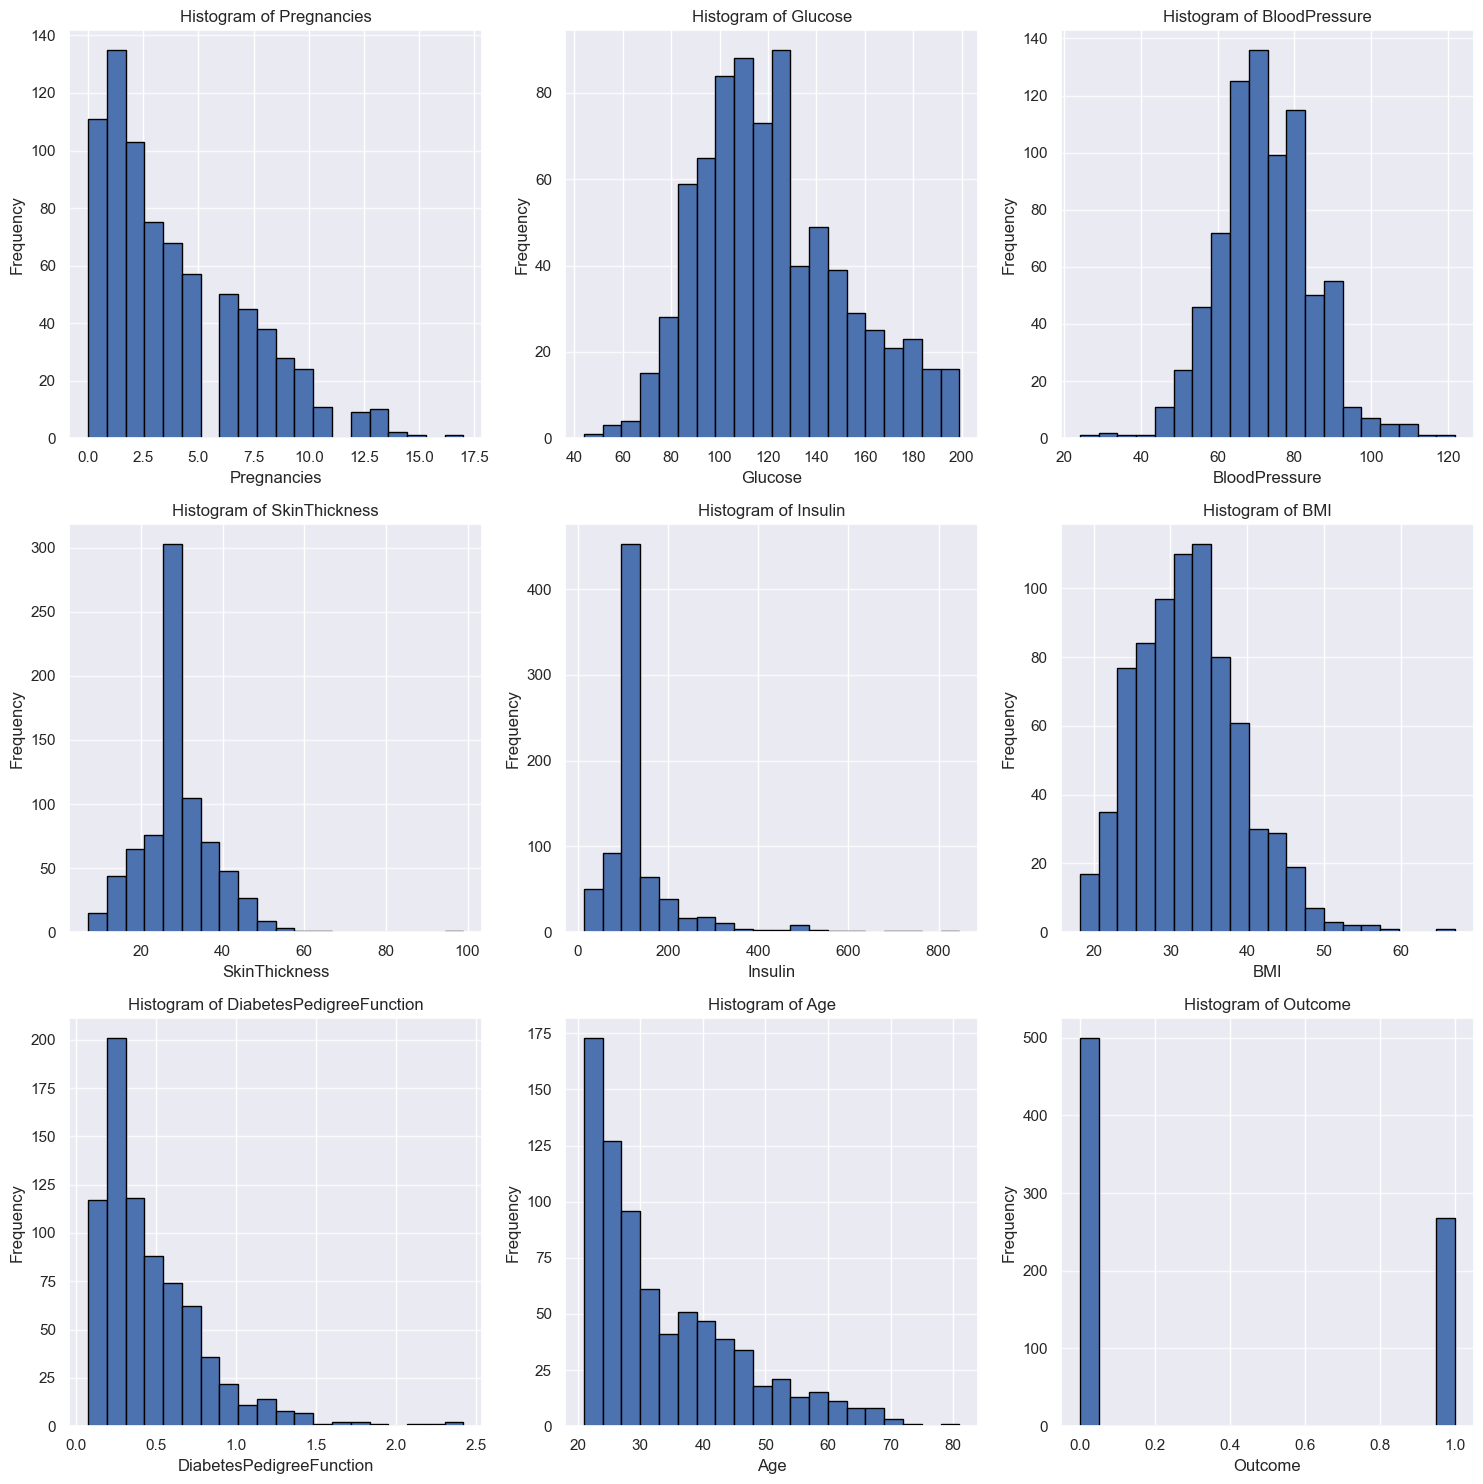

In [26]:
# Plot histograms for each column
num_columns = diabetes_data.shape[1]
num_rows = (num_columns + 2) // 3 # Calculate rows needed for 3 columns per row
plt.figure(figsize=(15, 5 * num_rows)) # Adjust figure size dynamically

for i, column in enumerate(diabetes_data.columns):
    plt.subplot(num_rows, 3, i + 1)
    diabetes_data[column].hist(bins=20, edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.savefig('histograms_of_all_columns.png')
print("Histograms of all columns saved as 'histograms_of_all_columns.png'")

#### Plot the correlation matrix heatmap

Correlation between various features


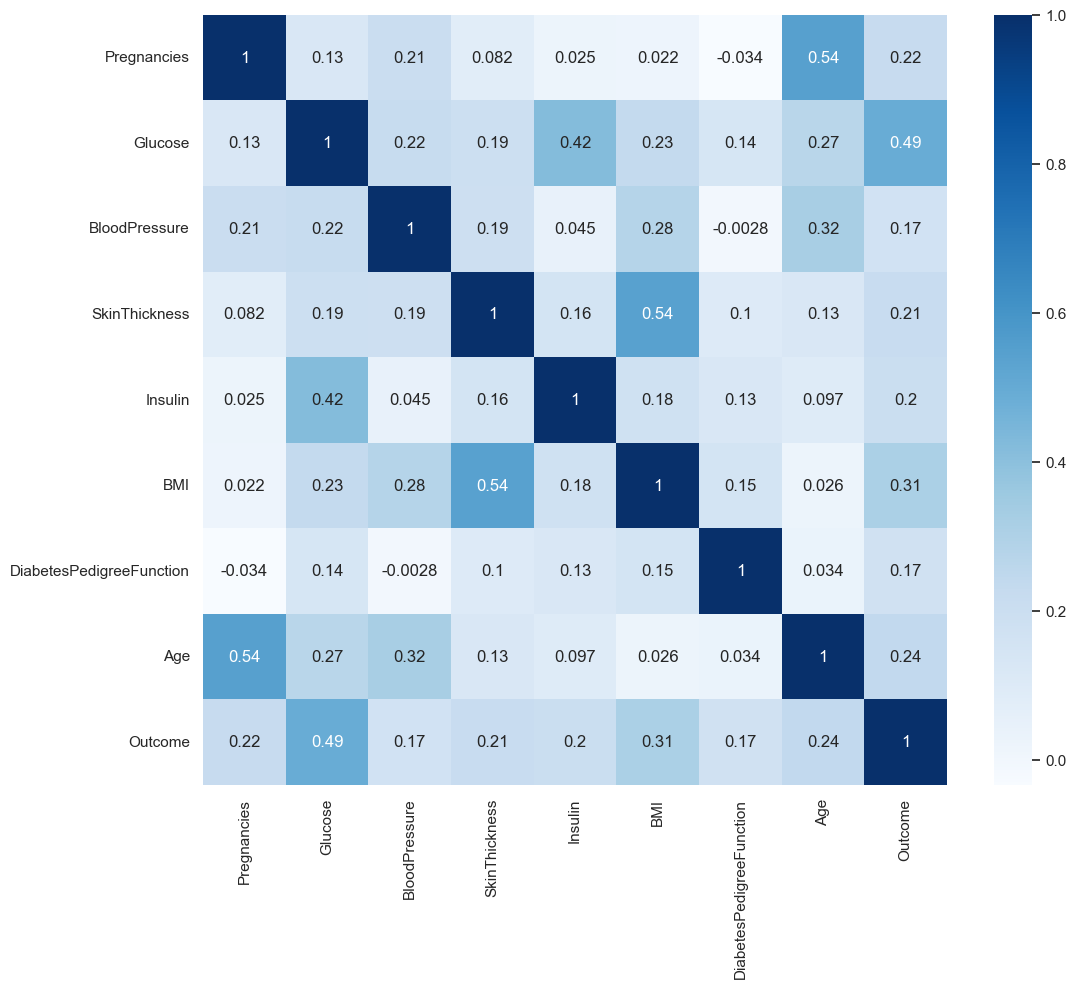

In [27]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

**<font color='teal'> Define the `y` variable as the `Outcome` column.</font>**

In [28]:
# Define the target variable (y)
y = diabetes_data['Outcome']

# Define the features (X) by dropping the 'Outcome' column
X = diabetes_data.drop('Outcome', axis=1)



**<font color='teal'> Create a 70/30 train and test split. </font>**

In [29]:
# Create the 70/30 train and test split
# test_size=0.30 means 30% for testing, 70% for training
# random_state ensures reproducibility of your split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (537, 8)
Shape of X_test: (231, 8)
Shape of y_train: (537,)
Shape of y_test: (231,)


**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

Note: Don't forget to fit() your scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while you standardize your data.

In [30]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler ONLY on X_train
# This calculates the mean and standard deviation for each feature in the training set
scaler.fit(X_train)

# Transform both X_train and X_test using the fitted scaler
# This scales the values based on the means and standard deviations learned from X_train
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# To see the results, you can convert them back to DataFrames (optional, but good for inspection)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("X_train_scaled (first 5 rows):")
print(X_train_scaled_df.head())
print("\nDescriptive statistics of X_train_scaled (should have mean close to 0 and std close to 1):")
print(X_train_scaled_df.describe())

print("\nX_test_scaled (first 5 rows):")
print(X_test_scaled_df.head())
print("\nDescriptive statistics of X_test_scaled:")
print(X_test_scaled_df.describe()) # Note: X_test_scaled might not have mean=0, std=1 exactly,
                                   # because it's transformed using X_train's parameters.

X_train_scaled (first 5 rows):
     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
334    -0.836294 -0.896108      -1.004400      -1.269545 -0.956993 -1.203826   
139     0.390728 -0.563997      -0.020266       0.029693  2.136797  0.664498   
485    -1.143050  0.432336      -0.348311       1.565156  1.267755  1.440571   
547     0.083972  0.299491      -0.348311      -0.915207  0.294428  0.118373   
18     -0.836294 -0.630419      -3.464737       1.092706 -0.667312  1.584288   

     DiabetesPedigreeFunction       Age  
334                 -0.614216 -0.948610  
139                 -0.909738 -0.434667  
485                 -0.306991 -0.777296  
547                 -0.906812 -0.434667  
18                  -0.839515 -0.006380  

Descriptive statistics of X_train_scaled (should have mean close to 0 and std close to 1):
        Pregnancies       Glucose  BloodPressure  SkinThickness       Insulin  \
count  5.370000e+02  5.370000e+02   5.370000e+02   5.370000e+02

#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

In [31]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

**<font color='teal'> Print the train and test scores for each iteration.</font>**

In [32]:
print(test_scores)
print(train_scores)

[0.683982683982684, 0.7056277056277056, 0.6926406926406926, 0.70995670995671, 0.670995670995671, 0.7012987012987013, 0.696969696969697, 0.696969696969697, 0.70995670995671]
[1.0, 0.845437616387337, 0.839851024208566, 0.8212290502793296, 0.8212290502793296, 0.8212290502793296, 0.8119180633147114, 0.8044692737430168, 0.7951582867783985]


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

In [33]:
max_train_score = max(train_scores)
max_score_index = train_scores.index(max_train_score)

# Assuming the index directly corresponds to k-1 (i.e., index 0 is k=1)
# If your k started at a different value, adjust accordingly.
number_of_neighbors_for_max_train_score = max_score_index + 1

print(f"The maximum training score is: {max_train_score}")
print(f"It occurred at index: {max_score_index}")
print(f"Therefore, the number of neighbors that resulted in the max score in the training dataset is: {number_of_neighbors_for_max_train_score} (assuming k started from 1).")

The maximum training score is: 1.0
It occurred at index: 0
Therefore, the number of neighbors that resulted in the max score in the training dataset is: 1 (assuming k started from 1).


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the testing dataset. </font>**

In [35]:
max_test_score = max(test_scores)
max_score_index = test_scores.index(max_test_score)

# Since the loop for 'i' started from 1, the number of neighbors is index + 1
number_of_neighbors_for_max_test_score = max_score_index + 1

print(f"The maximum testing score is: {max_test_score}")
print(f"It occurred at index: {max_score_index}")
print(f"Therefore, the number of neighbors that resulted in the max score in the testing dataset is: {number_of_neighbors_for_max_test_score}")

The maximum testing score is: 0.70995670995671
It occurred at index: 3
Therefore, the number of neighbors that resulted in the max score in the testing dataset is: 4


Plot the train and test model performance by number of neighbors.

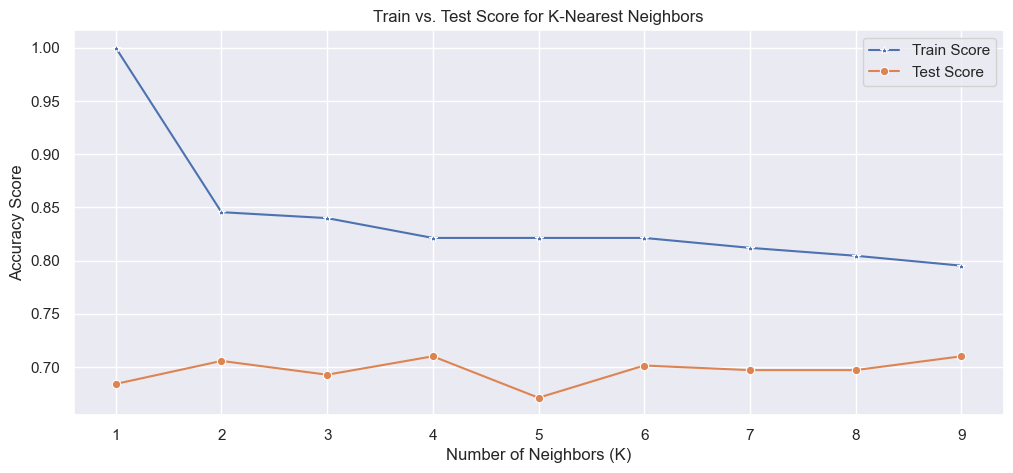

In [37]:
plt.figure(figsize=(12, 5))
# Corrected: Specify x and y arguments explicitly
p = sns.lineplot(x=range(1, 10), y=train_scores, marker='*', label='Train Score')
p = sns.lineplot(x=range(1, 10), y=test_scores, marker='o', label='Test Score')

plt.title('Train vs. Test Score for K-Nearest Neighbors') # Add a title for clarity
plt.xlabel('Number of Neighbors (K)') # Label the x-axis
plt.ylabel('Accuracy Score') # Label the y-axis
plt.xticks(range(1, 10)) # Ensure x-axis ticks are for each K value
plt.grid(True) # Add a grid for better readability
plt.legend() # Show the legend
plt.show() # Display the plot

**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

In [38]:
# --- 2. Fit and Score the Best Model ---

# Define the best number of neighbors based on the highest test score from your plot
best_n_neighbors = 4

# Initialize the KNeighborsClassifier with the best number of neighbors
knn_best = KNeighborsClassifier(n_neighbors=best_n_neighbors)

# Fit the model on the scaled training data
knn_best.fit(X_train_scaled_df, y_train)

# Evaluate the model on the scaled training data
train_accuracy = knn_best.score(X_train_scaled_df, y_train)

# Evaluate the model on the scaled testing data
test_accuracy = knn_best.score(X_test_scaled_df, y_test)

print(f"K-Nearest Neighbors Model with n_neighbors = {best_n_neighbors}:")
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

K-Nearest Neighbors Model with n_neighbors = 4:
Train Accuracy: 0.8417
Test Accuracy: 0.6926


In [39]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
pl = confusion_matrix(y_test,y_pred)

**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

Confusion matrix plotted and saved as 'confusion_matrix.png'


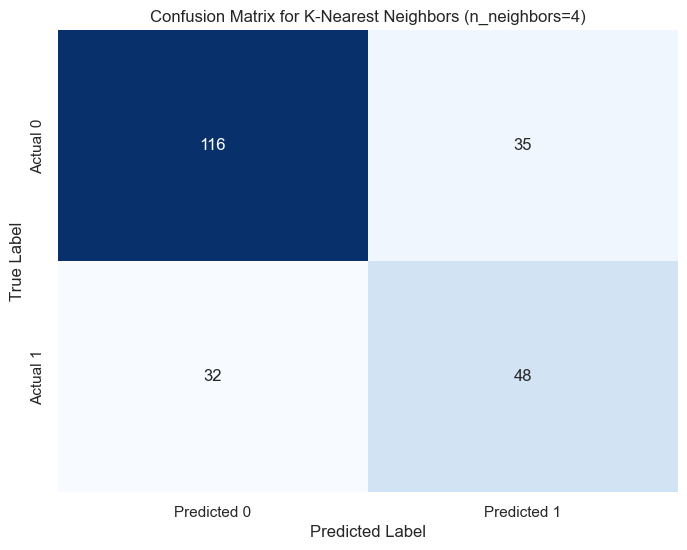

In [40]:
# --- Plot the Confusion Matrix ---
plt.figure(figsize=(8, 6))
sns.heatmap(pl, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix for K-Nearest Neighbors (n_neighbors={best_n_neighbors})')
plt.savefig('confusion_matrix.png')
print("Confusion matrix plotted and saved as 'confusion_matrix.png'")

**<font color='teal'> Print the classification report </font>**

In [41]:
from sklearn.metrics import classification_report
# --- Make predictions on the test set ---
y_pred = knn.predict(X_test_scaled_df)

# --- Print the Classification Report ---
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.65      1.00      0.79       151
           1       0.00      0.00      0.00        80

    accuracy                           0.65       231
   macro avg       0.33      0.50      0.40       231
weighted avg       0.43      0.65      0.52       231



C:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [42]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

#### Print the best score and best parameter for n_neighbors.

In [43]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7526440879382056
Best Parameters: {'n_neighbors': 31}


Here you can see that the ideal number of n_neighbors for this model is 14 based on the grid search performed. 

**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Randon Forest model.
</font>**

In [47]:
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier

# --- Define the parameter grid for n_estimators (THIS WAS THE MISSING PART) ---
param_grid_rf = {'n_estimators': np.arange(10, 201, 10)}

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
rf_grid_search = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV object to the scaled data
rf_grid_search.fit(X, y)

# Print the best score and best parameters found by GridSearchCV
print(f"Random Forest Best Score: {rf_grid_search.best_score_:.4f}")
print(f"Random Forest Best Parameters: {rf_grid_search.best_params_}")

Random Forest Best Score: 0.7709
Random Forest Best Parameters: {'n_estimators': 30}
